In [1]:
from nba_api.stats.endpoints import shotchartleaguewide, commonplayerinfo
from nba_api.stats.static import players

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:

# Call API - Individual player
response = shotchartleaguewide.ShotChartLeagueWide(
    league_id="00",
    season="2019-20"
)

content = json.loads(response.get_json())

results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows)
df.columns = headers

print(df)
# df.to_csv("output.csv", mode='a', index=False, header=False)

def create_court(ax, color):
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)


          GRID_TYPE        SHOT_ZONE_BASIC         SHOT_ZONE_AREA  \
0   League Averages      Above the Break 3         Back Court(BC)   
1   League Averages      Above the Break 3              Center(C)   
2   League Averages      Above the Break 3   Left Side Center(LC)   
3   League Averages      Above the Break 3  Right Side Center(RC)   
4   League Averages              Backcourt         Back Court(BC)   
5   League Averages  In The Paint (Non-RA)              Center(C)   
6   League Averages  In The Paint (Non-RA)              Center(C)   
7   League Averages  In The Paint (Non-RA)           Left Side(L)   
8   League Averages  In The Paint (Non-RA)          Right Side(R)   
9   League Averages          Left Corner 3           Left Side(L)   
10  League Averages              Mid-Range              Center(C)   
11  League Averages              Mid-Range              Center(C)   
12  League Averages              Mid-Range   Left Side Center(LC)   
13  League Averages              M

In [3]:
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2


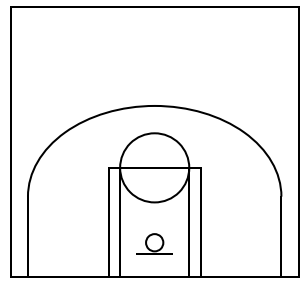

In [4]:
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.show()